In [52]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [53]:
results = torch.load('../results/final_results.pt')

In [54]:
print(results['layer_0_perf']['exec-time-approx'])
print(results['layer_0_perf']['exec-time-compute'])

[0, 4.306841641664505, 9.5289908349514, 14.510665088891983, 18.810754641890526]
[151.9345287233591, 147.18435890972614, 147.09611050784588, 146.46637067198753, 0.13221055269241333]


In [55]:
NUM_SCHEMES = 5

timing   = np.zeros((NUM_SCHEMES, NUM_SCHEMES, 2))
speedups = np.zeros((NUM_SCHEMES, NUM_SCHEMES))
for i in range(NUM_SCHEMES):
    base_approx = results['layer_0_perf']['exec-time-approx'][i]
    base_compute = results['layer_0_perf']['exec-time-compute'][i]
    for j in range(NUM_SCHEMES):
        timing[i,:,0] = np.array(results[i]['layer_1_perf']['exec-time-approx']) + base_approx
        timing[i,:,1] = np.array(results[i]['layer_1_perf']['exec-time-compute']) + base_compute
        speedups[i, j] = timing[0,0,1]/np.max(timing[i,j,:])
        print(i, j, timing[i,j,:], np.max(timing[i,j,:]))

0 0 [  0.        152.1810703] 152.18107029795647
0 1 [  0.9347219  152.24239789] 152.2423978894949
0 2 [  1.68397278 152.17920393] 152.17920392751694
0 3 [  2.47669779 152.24903077] 152.2490307688713
0 4 [  3.24316882 152.08407491] 152.0840749144554
1 0 [  4.30684164 147.49587327] 147.49587327241898
1 1 [  5.17652184 147.61381969] 147.61381968855858
1 2 [  6.01072423 147.54838683] 147.54838682711124
1 3 [  6.66494295 147.4007275 ] 147.4007274955511
1 4 [  7.52840936 147.35879749] 147.35879749059677
2 0 [  9.52899083 147.34533802] 147.34533801674843
2 1 [ 10.39085723 147.37255685] 147.37255685031414
2 2 [ 11.13095507 147.35642821] 147.35642820596695
2 3 [ 12.06445135 147.3202128 ] 147.32021279633045
2 4 [ 12.67810538 147.36641571] 147.36641570925713
3 0 [ 14.51066509 146.7768345 ] 146.7768345028162
3 1 [ 15.36039449 146.76093869] 146.76093868911266
3 2 [ 16.25334099 146.83379605] 146.83379605412483
3 3 [ 16.87658019 146.76811174] 146.76811173558235
3 4 [ 17.7605655  146.60657942] 146.60

In [56]:
speedups

array([[1.        , 0.99959717, 1.00001226, 0.99955362, 1.00063777],
       [1.03176494, 1.03094054, 1.03139772, 1.03243093, 1.0327247 ],
       [1.03281904, 1.03262828, 1.03274131, 1.03299518, 1.03267132],
       [1.03681941, 1.0369317 , 1.03641719, 1.03688103, 1.03802347],
       [8.09010979, 7.70903025, 7.35845451, 7.16492566, 6.92645217]])

In [57]:
print(results[4]['layer_1_perf']['exec-time-approx'])
print(results[4]['layer_1_perf']['exec-time-compute'])

[0, 0.9298697113990784, 1.8703639507293701, 2.4289730936288834, 3.1602438539266586]
[0.3520641475915909, 0.256439670920372, 0.36565959453582764, 0.2055913209915161, 0.15903078019618988]


In [58]:
accs = np.zeros((NUM_SCHEMES, NUM_SCHEMES))
for i in range(NUM_SCHEMES):
    for j in range(NUM_SCHEMES):
        accs[i,j] = results[i][j]['acc']
        print(i, j, accs[i,j])

0 0 96.81451416015625
0 1 95.45362854003906
0 2 93.24596405029297
0 3 91.3508071899414
0 4 92.8326644897461
1 0 96.81451416015625
1 1 95.46370697021484
1 2 93.24596405029297
1 3 91.3508071899414
1 4 92.82257843017578
2 0 96.82460021972656
2 1 95.46370697021484
2 2 93.24596405029297
2 3 91.36088562011719
2 4 92.82257843017578
3 0 96.82460021972656
3 1 95.46370697021484
3 2 93.24596405029297
3 3 91.34072875976562
3 4 92.8326644897461
4 0 96.81451416015625
4 1 95.46370697021484
4 2 93.23588562011719
4 3 91.3508071899414
4 4 92.8326644897461


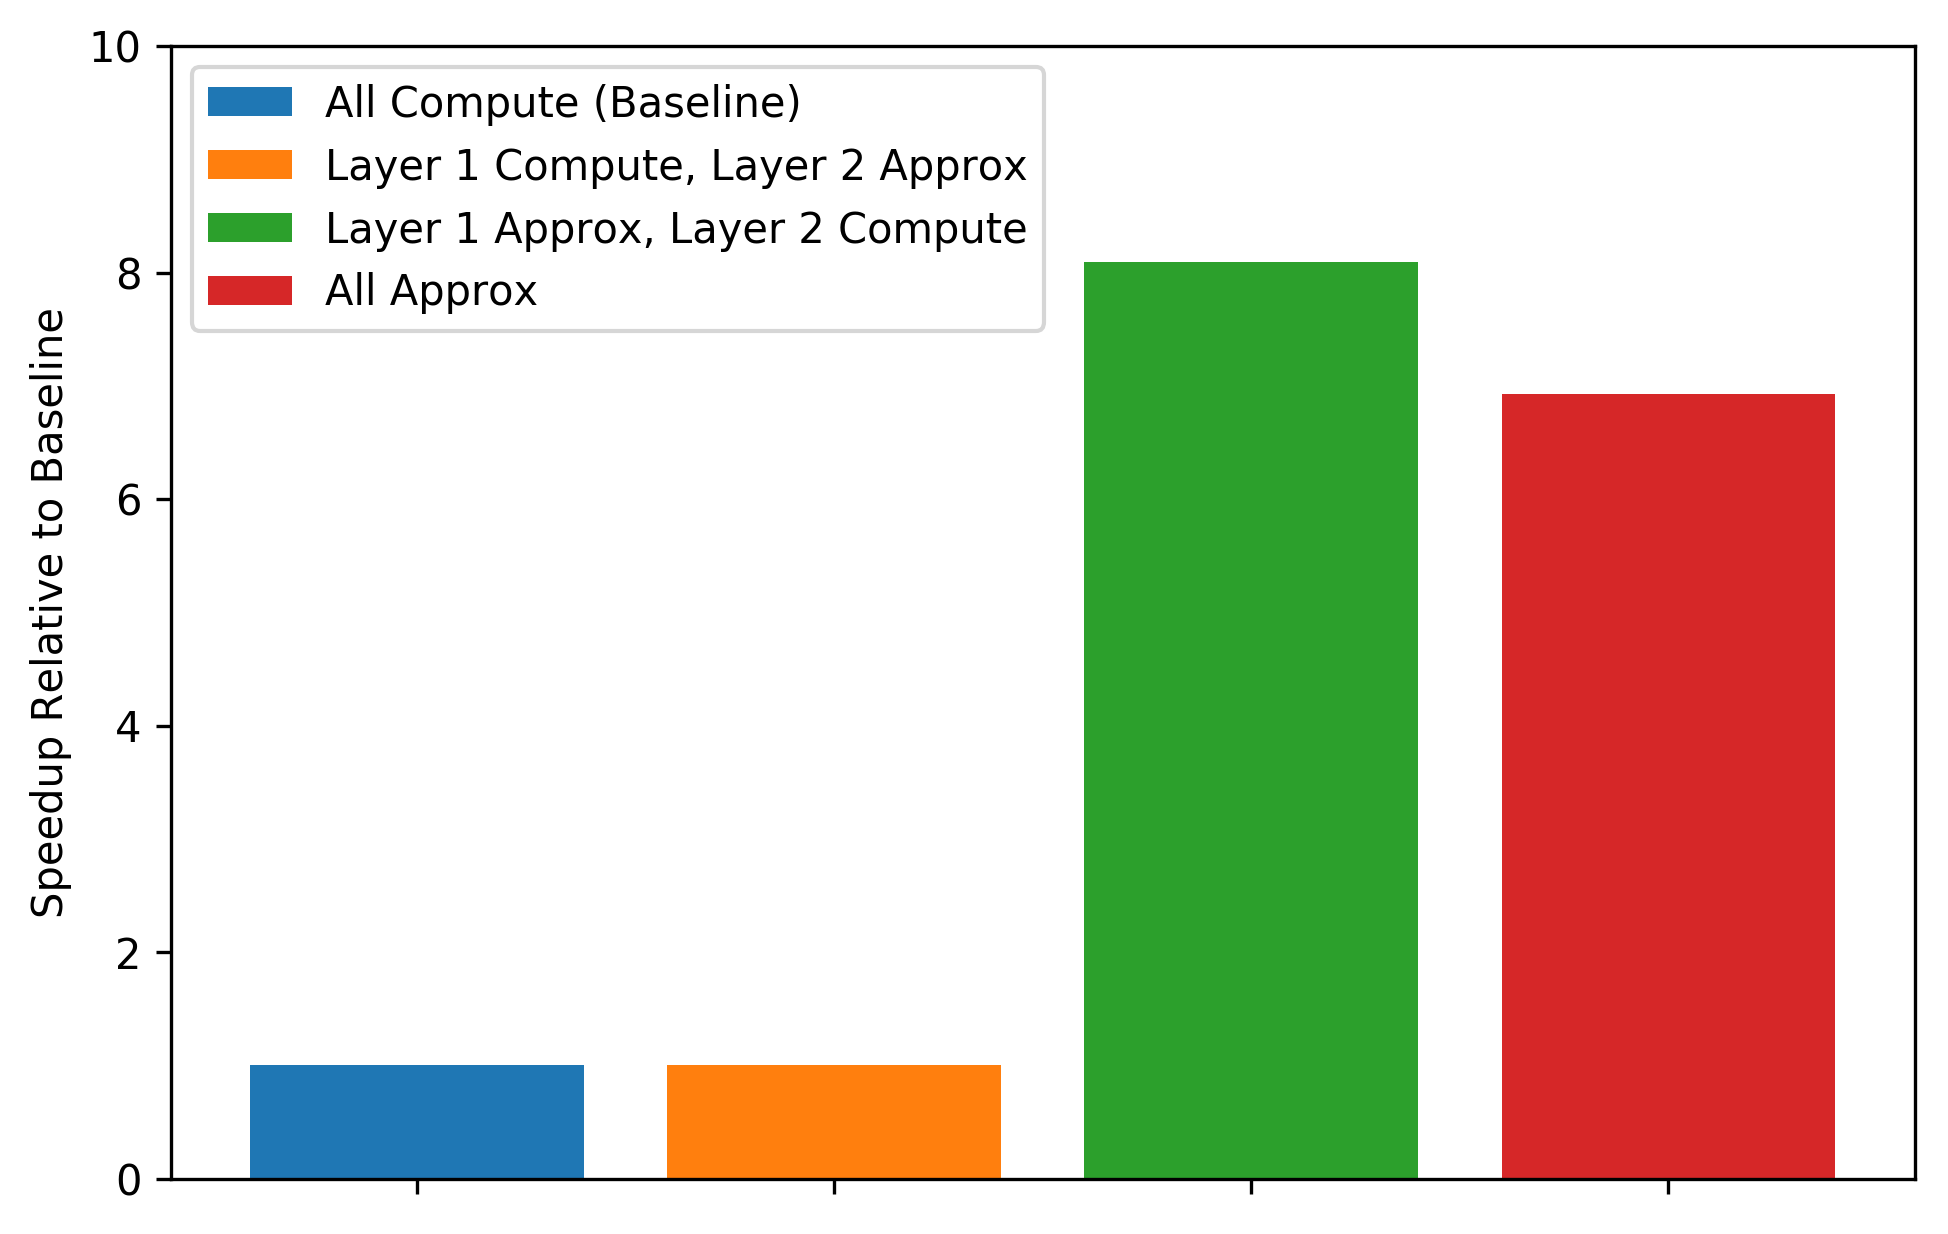

In [59]:
plt.figure(dpi=300, figsize = (7.5, 5))
plt.bar(0, speedups[0][0], label = 'All Compute (Baseline)')
plt.bar(1, speedups[0][4], label = 'Layer 1 Compute, Layer 2 Approx')
plt.bar(2, speedups[4][0], label = 'Layer 1 Approx, Layer 2 Compute')
plt.bar(3, speedups[4][4], label = 'All Approx')
plt.ylim([0,10])
plt.xticks(np.arange(4), [''])
plt.ylabel('Speedup Relative to Baseline')
plt.legend()
plt.show()

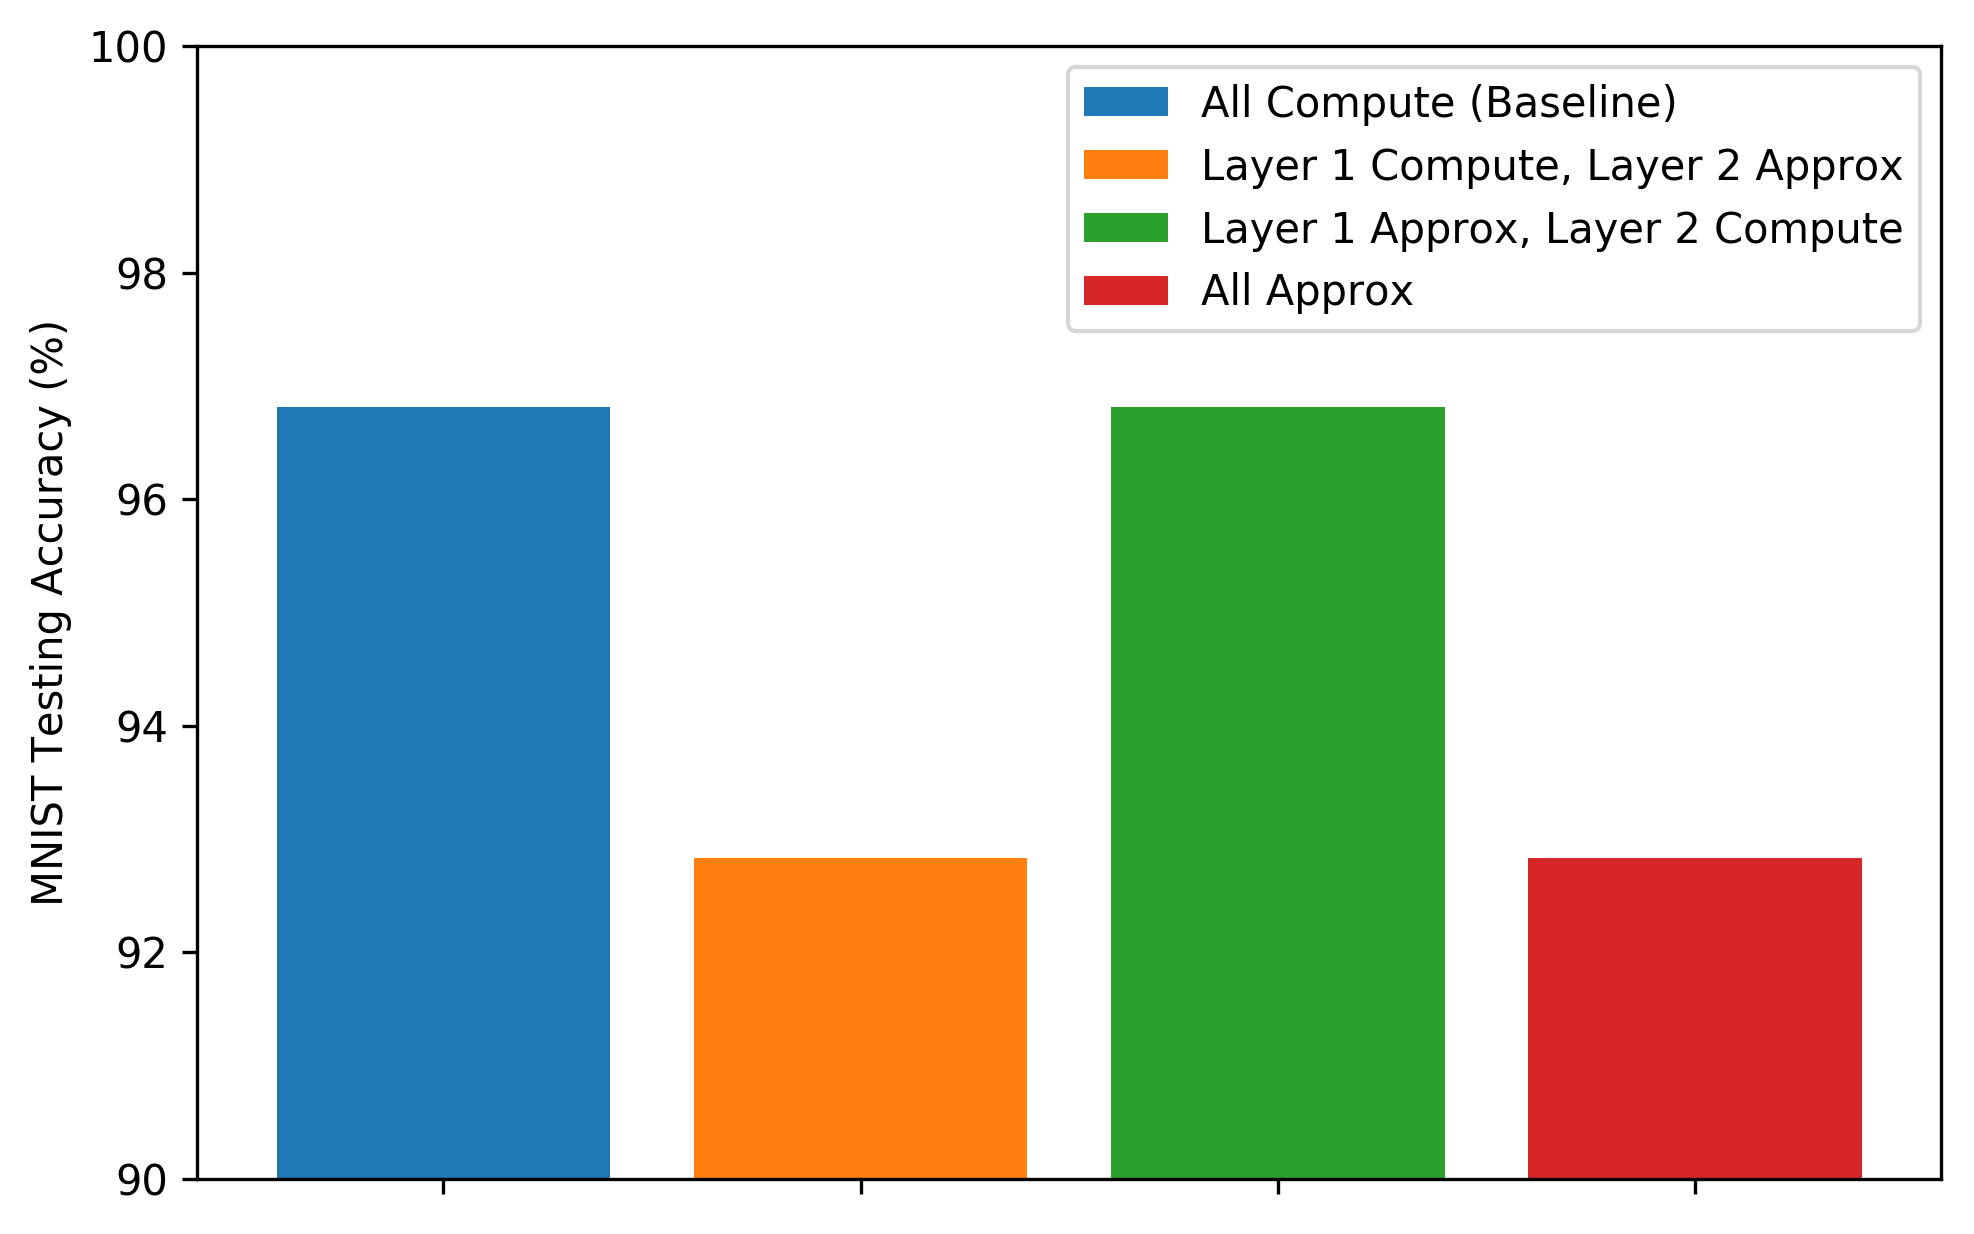

In [60]:
plt.figure(dpi=300, figsize = (7.5, 5))
plt.bar(0, accs[0][0], label = 'All Compute (Baseline)')
plt.bar(1, accs[0][4], label = 'Layer 1 Compute, Layer 2 Approx')
plt.bar(2, accs[4][0], label = 'Layer 1 Approx, Layer 2 Compute')
plt.bar(3, accs[4][4], label = 'All Approx')
plt.ylim([90,100])
plt.xticks(np.arange(4), [''])
plt.ylabel('MNIST Testing Accuracy (%)')
plt.legend()
plt.show()